1. Загрузите файл HR.csv в pandas dataframe

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


3.Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

4.Рассчитайте сколько сотрудников работает в каждом департаменте.

In [14]:
df.groupby('department').salary.count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: salary, dtype: int64

5.Показать распределение сотрудников по зарплатам.

In [15]:
df.groupby('salary').department.count()

salary
high      1237
low       7316
medium    6446
Name: department, dtype: int64

6.Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [16]:
df.groupby(['department', 'salary'])\
    .agg({'satisfaction_level': 'count'})\
    .rename(columns={"satisfaction_level": "qty_people"})

qty_people
department  salary            
IT          high            83
            low            609
            medium         535
RandD       high            51
            low            364
            medium         372
accounting  high            74
            low            358
            medium         335
hr          high            45
            low            335
            medium         359
management  high           225
            low            180
            medium         225
marketing   high            80
            low            402
            medium         376
product_mng high            68
            low            451
            medium         383
sales       high           269
            low           2099
            medium        1772
support     high           141
            low           1146
            medium         942
technical   high           201
            low           1372
            medium        1147

7.Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Графики распределений рабочего времени для низкого и высокого оклада:


<Axes: xlabel='average_montly_hours', ylabel='Count'>

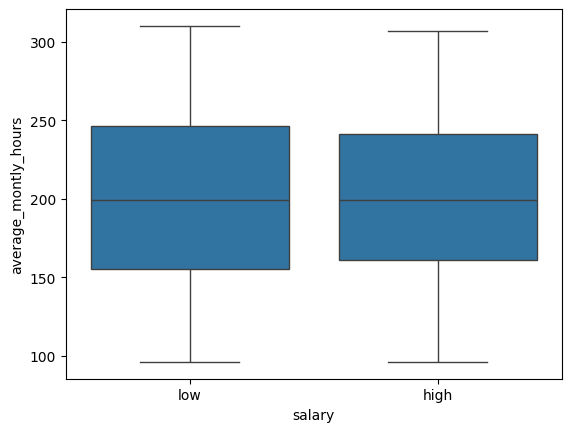

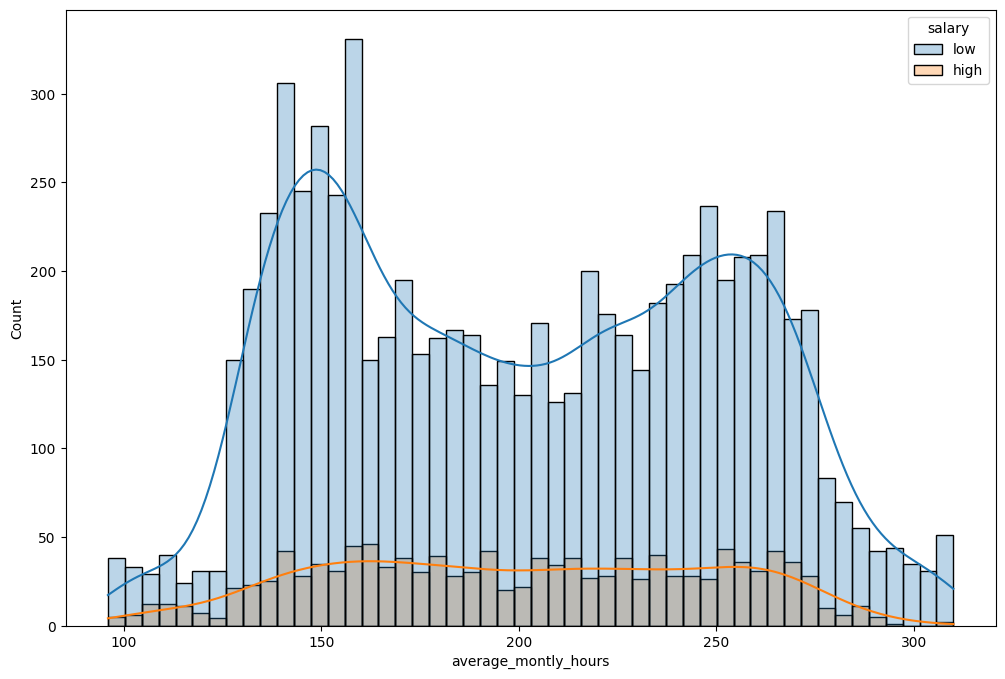

In [27]:
df_h_l = df.query('salary=="low" or salary=="high"')
print('Графики распределений рабочего времени для низкого и высокого оклада:')

sns.boxplot(
    y="average_montly_hours",
    x='salary',
    data=df_h_l
)

plt.figure(figsize=(12, 8))
sns.histplot(
    data=df_h_l,
    x="average_montly_hours",
    label="Sepal Length",
    hue='salary',
    alpha=0.3,
    bins=50,
    kde=True)

In [28]:
# Можно наблюдать бимодальное распределение при низком уровне зарплат, при высоком уровне зарплат количество часов более нормально, но также не является нормальным.
# Для проверки применим непараметрический тест Крускала-Уоллиса
from scipy import stats

In [31]:
df_high = df.query('salary=="high"')
df_low = df.query('salary=="low"')
# Тест Крускала-Уоллиса содержит гипотезы:
# H0: медиана одинакова для всех групп данных.
# H1: медиана не одинакова для всех групп данных

stat, p = stats.kruskal(
    df_high['average_montly_hours'], df_low['average_montly_hours'])
print(f'р = {p}')
print('т.к. p > 0,05 , принимается гипотеза о том, что среднее значение одинаково')
print('Значит, можно сделать вывод о том, что в среднем все работают одинаково')

р = 0.8241282261403291
т.к. p > 0,05 , принимается гипотеза о том, что среднее значение одинаково
Значит, можно сделать вывод о том, что в среднем все работают одинаково


8.Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
-Доля сотрудников с повышением за последние 5 лет
-Средняя степень удовлетворенности
-Среднее количество проектов


In [17]:
df_left= df.query('left==1')
df_stay= df.query('left==0')

In [19]:
up_5y_left = len(df_left.query('promotion_last_5years ==1'))/len(df_left)

print(
    f'Доля сотрудников с повышением за последние 5 лет среди уволившихся {up_5y_left *100:.3f}%')

Доля сотрудников с повышением за последние 5 лет среди уволившихся 0.532%


In [20]:
up_5y_stay = len(df_stay.query('promotion_last_5years ==1'))/len(df_stay)

print(
    f'Доля сотрудников с повышением за последние 5 лет среди работающих {up_5y_stay*100:.3f}%')

Доля сотрудников с повышением за последние 5 лет среди работающих 2.625%


In [21]:
print(
    f'Средняя степень удовлетворенности для уволившихся сотрудников: {df_left.satisfaction_level.mean():.3f}')

Средняя степень удовлетворенности для уволившихся сотрудников: 0.440


In [22]:
print(
    f'Средняя степень удовлетворенности для работающих сотрудников:{df_stay.satisfaction_level.mean():.3f}')

Средняя степень удовлетворенности для работающих сотрудников:0.667


In [23]:
print(
    f'Среднее количество проектов для уволившихся сотрудников: {df_left.number_project.mean():.3f}')

Среднее количество проектов для уволившихся сотрудников: 3.856


In [24]:
print(
    f'Среднее количество проектов для работающих сотрудников:{df_stay.number_project.mean():.3f}')

Среднее количество проектов для работающих сотрудников:3.787
